In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

numtaps - порядок фильтра

bands - монотонная неубывающая последовательность частот. Все элементы должны быть неотрицательными и меньше или равными частоте Найквиста, заданной параметром nyq.

desired - последовательность амплитуд, содержащая требуемое усиление и ослабление на заданных значениях частот из bands.

weight - относительный "вес" полос пропускания и подавления. Задает компромисс качества в этих полосах.

nyq или fs - частота Найквиста. Если значение не задано, по умолчанию равно единице.

117


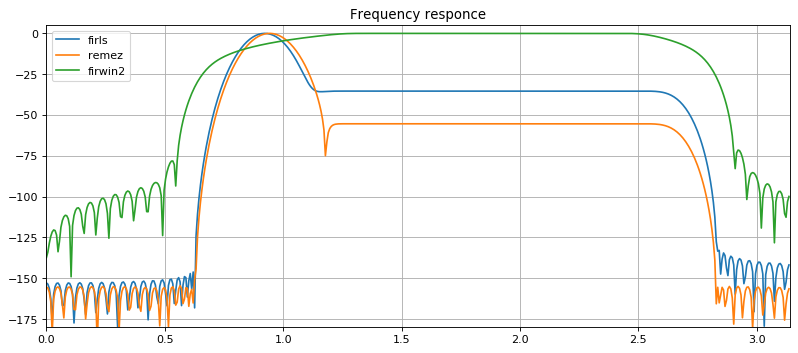

In [14]:
fs = 10
N = 117
desired = (0, 0, 1, 1, 0, 0) # m?
bands = (0, 1, 2, 4, 4.5, 5) # f0

# FIR filters
fir_firls = signal.firls(N, bands, desired, fs=fs)
fir_remez = signal.remez(N, bands, desired[::2], fs=fs, maxiter=100) #аналог для firpm 3 лабы
print(np.size(fir_remez))
fir_firwin2 = signal.firwin2(N, bands, desired, fs=fs)

# PLot results and calculate FFTs
plt.figure(figsize=(12, 5), dpi=80)
plt.title('Frequency responce')
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = signal.freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)